In [1]:
import re

# Cargar los libros
def cargar_libro(ruta):
    with open(ruta, 'r', encoding='utf-8') as file:
        texto = file.read()
    return texto

libro1 = cargar_libro('laws_by_plato.txt')  # Cambia 'libro1.txt' por la ruta real
libro2 = cargar_libro('the_common_law_by_oliver.txt')

# Limpieza básica (opcional)
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'\n+', ' ', texto)  # Eliminar saltos de línea
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar puntuación (opcional)
    return texto

libro1_limpio = limpiar_texto(libro1)
libro2_limpio = limpiar_texto(libro2)


In [3]:
def estadisticas_basicas(texto):
    palabras = texto.split()
    num_palabras = len(palabras)
    num_oraciones = len(re.split(r'[.!?]', texto))
    longitud_promedio_palabras = sum(len(p) for p in palabras) / num_palabras
    longitud_promedio_oraciones = num_palabras / num_oraciones

    return {
        'Total de palabras': num_palabras,
        'Longitud promedio de palabras': round(longitud_promedio_palabras, 2)
    }

print("Estadísticas libro 1:", estadisticas_basicas(libro1_limpio))
print("Estadísticas libro 2:", estadisticas_basicas(libro2_limpio))


Estadísticas libro 1: {'Total de palabras': 241746, 'Longitud promedio de palabras': 4.38}
Estadísticas libro 2: {'Total de palabras': 135766, 'Longitud promedio de palabras': 4.32}


In [10]:
import nltk
from nltk.corpus import stopwords
from collections import Counter


def palabras_frecuentes(texto, top=20):
    palabras = texto.split()
    palabras_filtradas = [p for p in palabras if p not in stop_words]
    frecuencias = Counter(palabras_filtradas)
    return frecuencias.most_common(top)

print("Palabras más frecuentes libro 1:", palabras_frecuentes(libro1_limpio))
print("Palabras más frecuentes libro 2:", palabras_frecuentes(libro2_limpio))


Palabras más frecuentes libro 1: [('the', 17495), ('and', 11046), ('of', 11045), ('to', 7442), ('in', 5009), ('be', 4152), ('is', 4047), ('that', 2725), ('or', 2519), ('which', 2438)]
Palabras más frecuentes libro 2: [('the', 10289), ('of', 4937), ('to', 4167), ('in', 2574), ('and', 2535), ('that', 2370), ('is', 2320), ('it', 2170), ('be', 1654), ('was', 1434)]


In [11]:
from nltk.util import ngrams

def generar_ngrams(texto, n=2):
    palabras = texto.split()
    return list(ngrams(palabras, n))

ngrams_libro1 = generar_ngrams(libro1_limpio, 2)  # Cambia a 3 para tríos
ngrams_libro2 = generar_ngrams(libro2_limpio, 2)

print("Primeros 5 bigramas libro 1:", ngrams_libro1[:5])
print("Primeros 5 bigramas libro 2:", ngrams_libro2[:5])


Primeros 5 bigramas libro 1: [('the', 'project'), ('project', 'gutenberg'), ('gutenberg', 'ebook'), ('ebook', 'of'), ('of', 'laws')]
Primeros 5 bigramas libro 2: [('the', 'project'), ('project', 'gutenberg'), ('gutenberg', 'ebook'), ('ebook', 'of'), ('of', 'the')]


In [12]:
def frecuencia_puntuacion(texto):
    puntuacion = re.findall(r'[^\w\s]', texto)
    return Counter(puntuacion)

print("Frecuencia de signos de puntuación libro 1:", frecuencia_puntuacion(libro1))
print("Frecuencia de signos de puntuación libro 2:", frecuencia_puntuacion(libro2))


Frecuencia de signos de puntuación libro 1: Counter({',': 17421, '.': 7189, ';': 3057, ':': 2383, "'": 1623, '?': 1127, '—': 861, '-': 495, '(': 444, ')': 444, '™': 57, '!': 32, '*': 12, '“': 11, '”': 11, '/': 8, '’': 6, '•': 4, '[': 3, ']': 3, '=': 2, '"': 2, '$': 2, '#': 1, '%': 1, '‘': 1})
Frecuencia de signos de puntuación libro 2: Counter({'.': 10973, ',': 10696, '/': 2471, ';': 1006, '(': 645, ')': 645, '"': 644, "'": 583, '[': 449, ']': 447, '-': 289, '&': 151, '—': 123, ':': 108, '?': 63, '™': 57, '*': 20, '“': 11, '”': 11, '’': 6, '•': 4, '$': 2, '#': 1, '}': 1, '!': 1, '%': 1, '‘': 1})


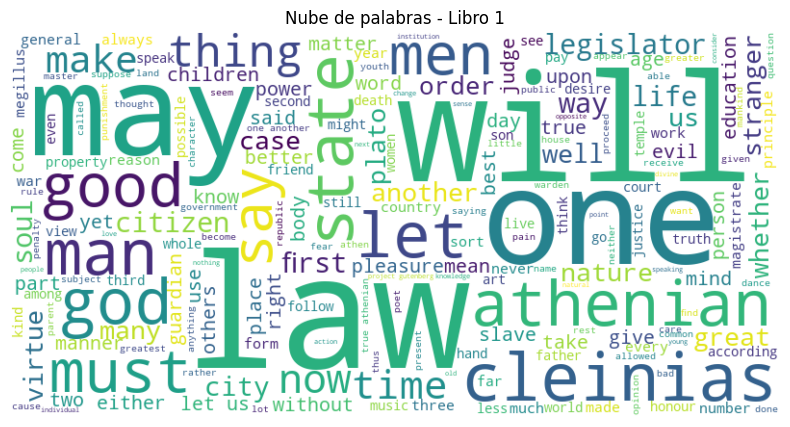

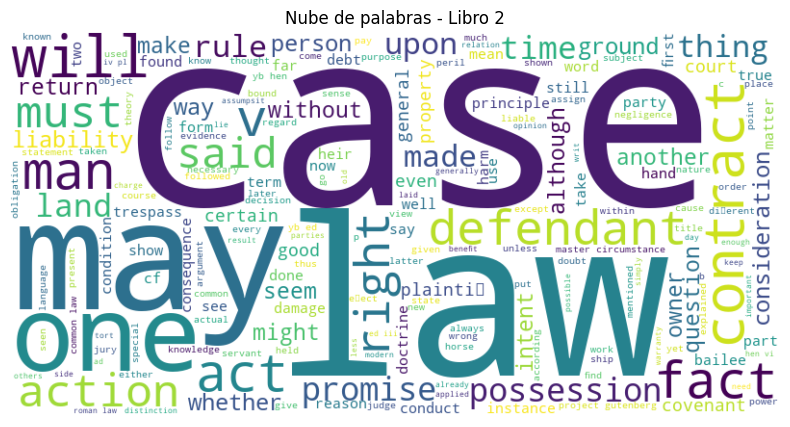

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generar_nube_palabras(texto, titulo):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()

generar_nube_palabras(libro1_limpio, "Nube de palabras - Libro 1")
generar_nube_palabras(libro2_limpio, "Nube de palabras - Libro 2")


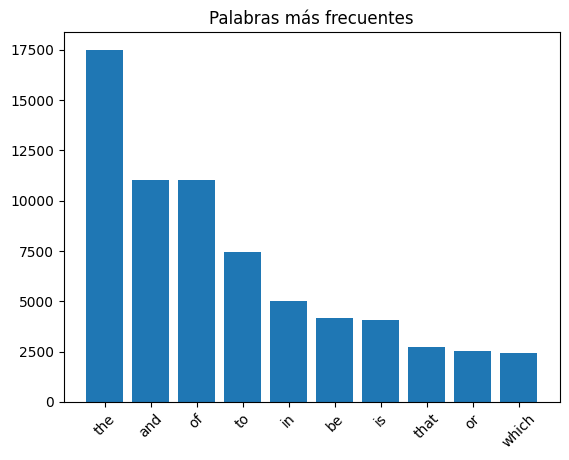

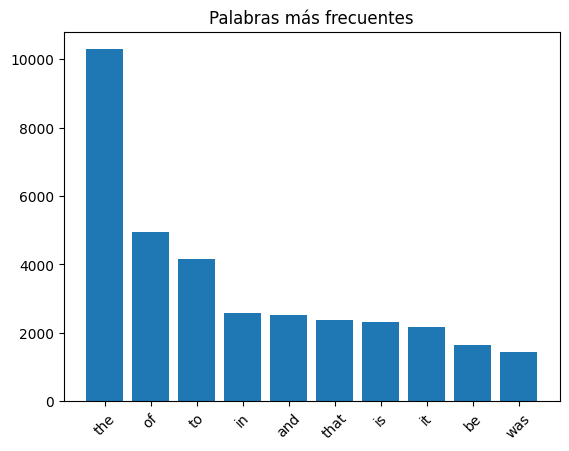

In [14]:
def graficar_frecuencias(texto, top=10):
    frecuencias = palabras_frecuentes(texto, top)
    palabras, conteos = zip(*frecuencias)
    plt.bar(palabras, conteos)
    plt.xticks(rotation=45)
    plt.title("Palabras más frecuentes")
    plt.show()

graficar_frecuencias(libro1_limpio)
graficar_frecuencias(libro2_limpio)
